In [2]:
import pandas_datareader as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')

In [10]:
import yfinance as yf

# Download stock data
df = yf.download('AAPL', start='2012-01-01', end='2019-12-17')

# Print the data
print(df)


[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.482931  302220800
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.550009  260022000
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.689340  271269600
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.821993  318292800
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.801653  394024400
...               ...        ...        ...        ...        ...        ...
2019-12-10  67.150002  67.517502  66.464996  67.120003  65.565010   90420400
2019-12-11  67.202499  67.775002  67.125000  67.692497  66.124260   78756800
2019-12-12  66.945000  68.139999  66.830002  67.864998  66.292763  137310400
2019-12-13  67.864998  68.824997  67.732498  68.787498  67.193901  133587600
2019-12

In [7]:
type(data)

pandas.core.frame.DataFrame

In [11]:
data.shape

(2002, 6)

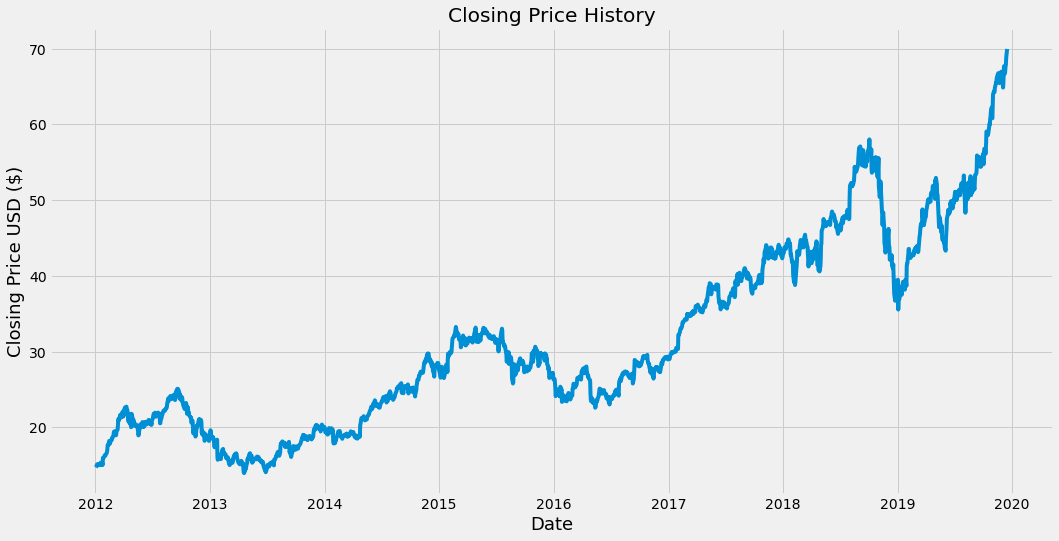

In [12]:
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price USD ($)',fontsize=18)
plt.show()

In [13]:
data = df.filter(['Close'])
dataset = data.values


In [15]:
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1602

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [17]:
trained_data = scaled_data[0:training_data_len,:]


In [21]:
x_train=[]
y_train=[]
for i in range(60,len(trained_data)):
    x_train.append(trained_data[i-60:i,0])
    y_train.append(trained_data[i,0])
    if i <=61:
        print(x_train)
        print(y_train)
        print()

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152]

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.0189

In [22]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [24]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1542, 60, 1)

In [25]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [26]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [27]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

1542/1542 [==============================] - 24s 14ms/step - loss: 8.3697e-04


In [28]:
test_data = scaled_data[training_data_len-60: , :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [29]:
y_test.shape

(400, 1)

In [32]:
x_test = np.array(x_test)

In [33]:
x_test.shape

(400, 60)

In [34]:
y_test

array([[47.04499817],
       [46.74750137],
       [46.57749939],
       [46.90750122],
       [46.79000092],
       [47.09000015],
       [47.03749847],
       [47.14500046],
       [46.97499847],
       [46.875     ],
       [46.71749878],
       [47.56000137],
       [47.95750046],
       [48.32749939],
       [48.49499893],
       [48.36500168],
       [47.92499924],
       [47.80749893],
       [48.06999969],
       [47.67499924],
       [47.70000076],
       [47.20999908],
       [47.18500137],
       [46.42250061],
       [46.625     ],
       [46.36500168],
       [46.22999954],
       [45.54249954],
       [46.10749817],
       [46.04000092],
       [46.375     ],
       [46.27750015],
       [46.79499817],
       [45.97999954],
       [46.34999847],
       [46.99250031],
       [47.64500046],
       [47.58750153],
       [46.97000122],
       [47.75749969],
       [47.83250046],
       [47.72750092],
       [47.86249924],
       [47.59999847],
       [47.97000122],
       [47

In [37]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [38]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 8ms/step


In [39]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

3.2259533309936526

C:\Users\mehul\AppData\Local\Temp\ipykernel_9148\3879233432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


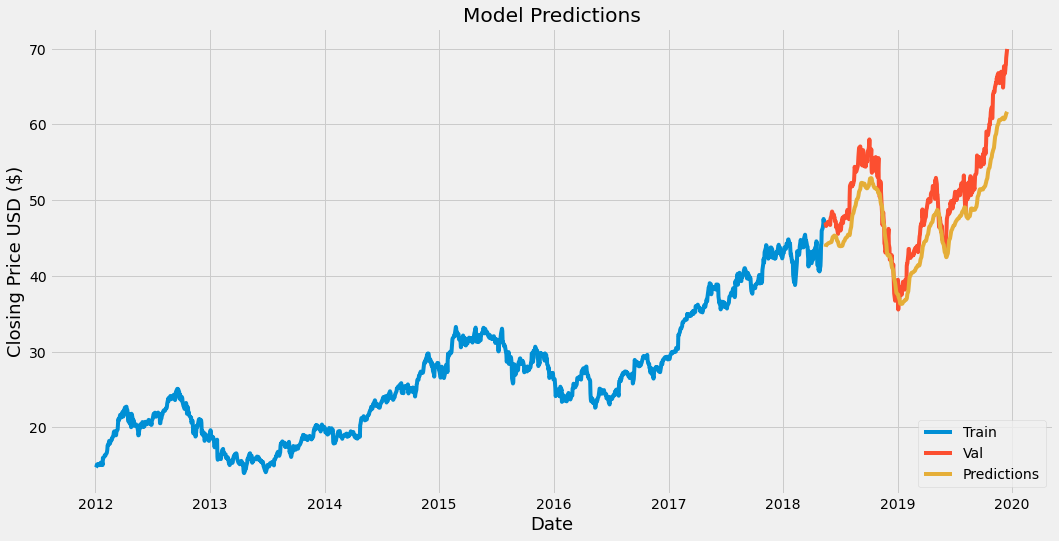

In [43]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model Predictions')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()